In [37]:
import torch
import torch.nn as nn
import torch.optim as optim
%matplotlib inline
from matplotlib import pyplot as plt

# 神经元

output = f(w * x + b), 其中 f 是非线性的激活函数.

# 使用 torch.nn 中的线性正向传播模型和损失函数

In [38]:
# recorded temperature data, c - celsius, u - unknown
t_cel = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_cel = torch.tensor(t_cel)
t_u = torch.tensor(t_u)
t_un = t_u * 0.1

In [39]:
t_cel.unsqueeze_(1) # <1>
t_u.unsqueeze_(1) # <1>

tensor([[35.7000],
        [55.9000],
        [58.2000],
        [81.9000],
        [56.3000],
        [48.9000],
        [33.9000],
        [21.8000],
        [48.4000],
        [60.4000],
        [68.4000]])

In [40]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)
shuffled_indices = torch.randperm(n_samples)
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_t_u = t_u[train_indices]
train_t_cel = t_cel[train_indices]
val_t_u = t_u[val_indices]
val_t_cel = t_cel[val_indices]

train_t_un = 0.1 * train_t_u
val_t_un = 0.1 * val_t_u

In [41]:
#def model(t_un, w2, w1, b):
#    return w2 * t_un**2 + w1 * t_un + b
linear_model = nn.Linear(1, 1)
linear_model(val_t_un) # <1>

list(linear_model.parameters())

[Parameter containing:
 tensor([[-0.9133]], requires_grad=True),
 Parameter containing:
 tensor([0.4945], requires_grad=True)]

In [42]:
#def loss_fn(t_cel, t_p):
#    squared_loss = (t_cel - t_p) ** 2
#    return squared_loss.mean()

In [43]:
def training_loop(n_epochs, train_t_un, train_t_cel, val_t_un, val_t_cel, model, loss_fn, optimizer):

    for epoch in range(1, n_epochs+1):
        train_t_p = model(train_t_un)
        train_loss = loss_fn(train_t_cel, train_t_p)
        with torch.no_grad():
            val_t_p = model(val_t_un)
            val_loss = loss_fn(val_t_cel, val_t_p)
            assert val_loss.requires_grad == False
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        
        if epoch % 1000 == 0 or epoch <= 3:
            print(f'Epoch {epoch}, Training loss {train_loss.item():.4f}, Validation loss {val_loss.item():.4f}')
    return list(model.parameters())

optimizer = optim.SGD(linear_model.parameters(), lr = 1e-2)
training_loop(
    n_epochs=5000,
    train_t_un=train_t_un, train_t_cel=train_t_cel, val_t_un=val_t_un, val_t_cel=val_t_cel,
    model=linear_model,
    loss_fn=nn.MSELoss(),
    optimizer=optimizer
)

Epoch 1, Training loss 241.2595, Validation loss 683.6348
Epoch 2, Training loss 72.8431, Validation loss 262.5848
Epoch 3, Training loss 36.3936, Validation loss 139.3772
Epoch 1000, Training loss 4.2638, Validation loss 9.7170
Epoch 2000, Training loss 3.2100, Validation loss 3.9311
Epoch 3000, Training loss 3.1603, Validation loss 3.0243
Epoch 4000, Training loss 3.1579, Validation loss 2.8439
Epoch 5000, Training loss 3.1578, Validation loss 2.8054


[Parameter containing:
 tensor([[5.1245]], requires_grad=True),
 Parameter containing:
 tensor([-16.1623], requires_grad=True)]

# 组建多层神经网络

In [44]:
# 从一个输入传递到13个模块, 13个模块分别进行激活函数, 最后线性合成到一个输出
seq_model = nn.Sequential(
    nn.Linear(1, 13),
    nn.Tanh(),
    nn.Linear(13, 1))

[[name, param] for name, param in seq_model.named_parameters()]

[['0.weight',
  Parameter containing:
  tensor([[-0.1463],
          [ 0.0290],
          [ 0.9862],
          [ 0.5703],
          [-0.8668],
          [ 0.6868],
          [-0.7038],
          [ 0.0016],
          [ 0.0191],
          [ 0.0648],
          [-0.4823],
          [ 0.9716],
          [-0.5197]], requires_grad=True)],
 ['0.bias',
  Parameter containing:
  tensor([-0.2428, -0.7910,  0.9454, -0.3983, -0.0174,  0.1094, -0.0702, -0.2754,
          -0.0248, -0.2633,  0.3989,  0.0864, -0.6448], requires_grad=True)],
 ['2.weight',
  Parameter containing:
  tensor([[ 2.1024e-02, -2.3097e-01,  2.6888e-04, -9.2882e-02,  8.1055e-02,
           -2.7365e-01,  2.5815e-01, -1.9934e-01,  1.8628e-01, -2.5148e-01,
            1.4977e-01, -2.1027e-01, -1.5522e-02]], requires_grad=True)],
 ['2.bias',
  Parameter containing:
  tensor([-0.1484], requires_grad=True)]]

Epoch 1, Training loss 154.4534, Validation loss 463.8430
Epoch 2, Training loss 148.4729, Validation loss 451.2113
Epoch 3, Training loss 142.8852, Validation loss 439.3633
Epoch 1000, Training loss 4.4769, Validation loss 39.0032
Epoch 2000, Training loss 3.2220, Validation loss 19.1967
Epoch 3000, Training loss 2.7720, Validation loss 11.6593
output tensor([[ 8.2535],
        [23.1788]], grad_fn=<AddmmBackward0>)
answer tensor([[ 8.],
        [28.]])
hidden tensor([[ 0.0790,  0.1047, -0.1111, -0.1538,  0.1086, -0.0955,  0.0934,  0.0814,
         -0.1179,  0.0825,  0.1515, -0.1113,  0.1039]])


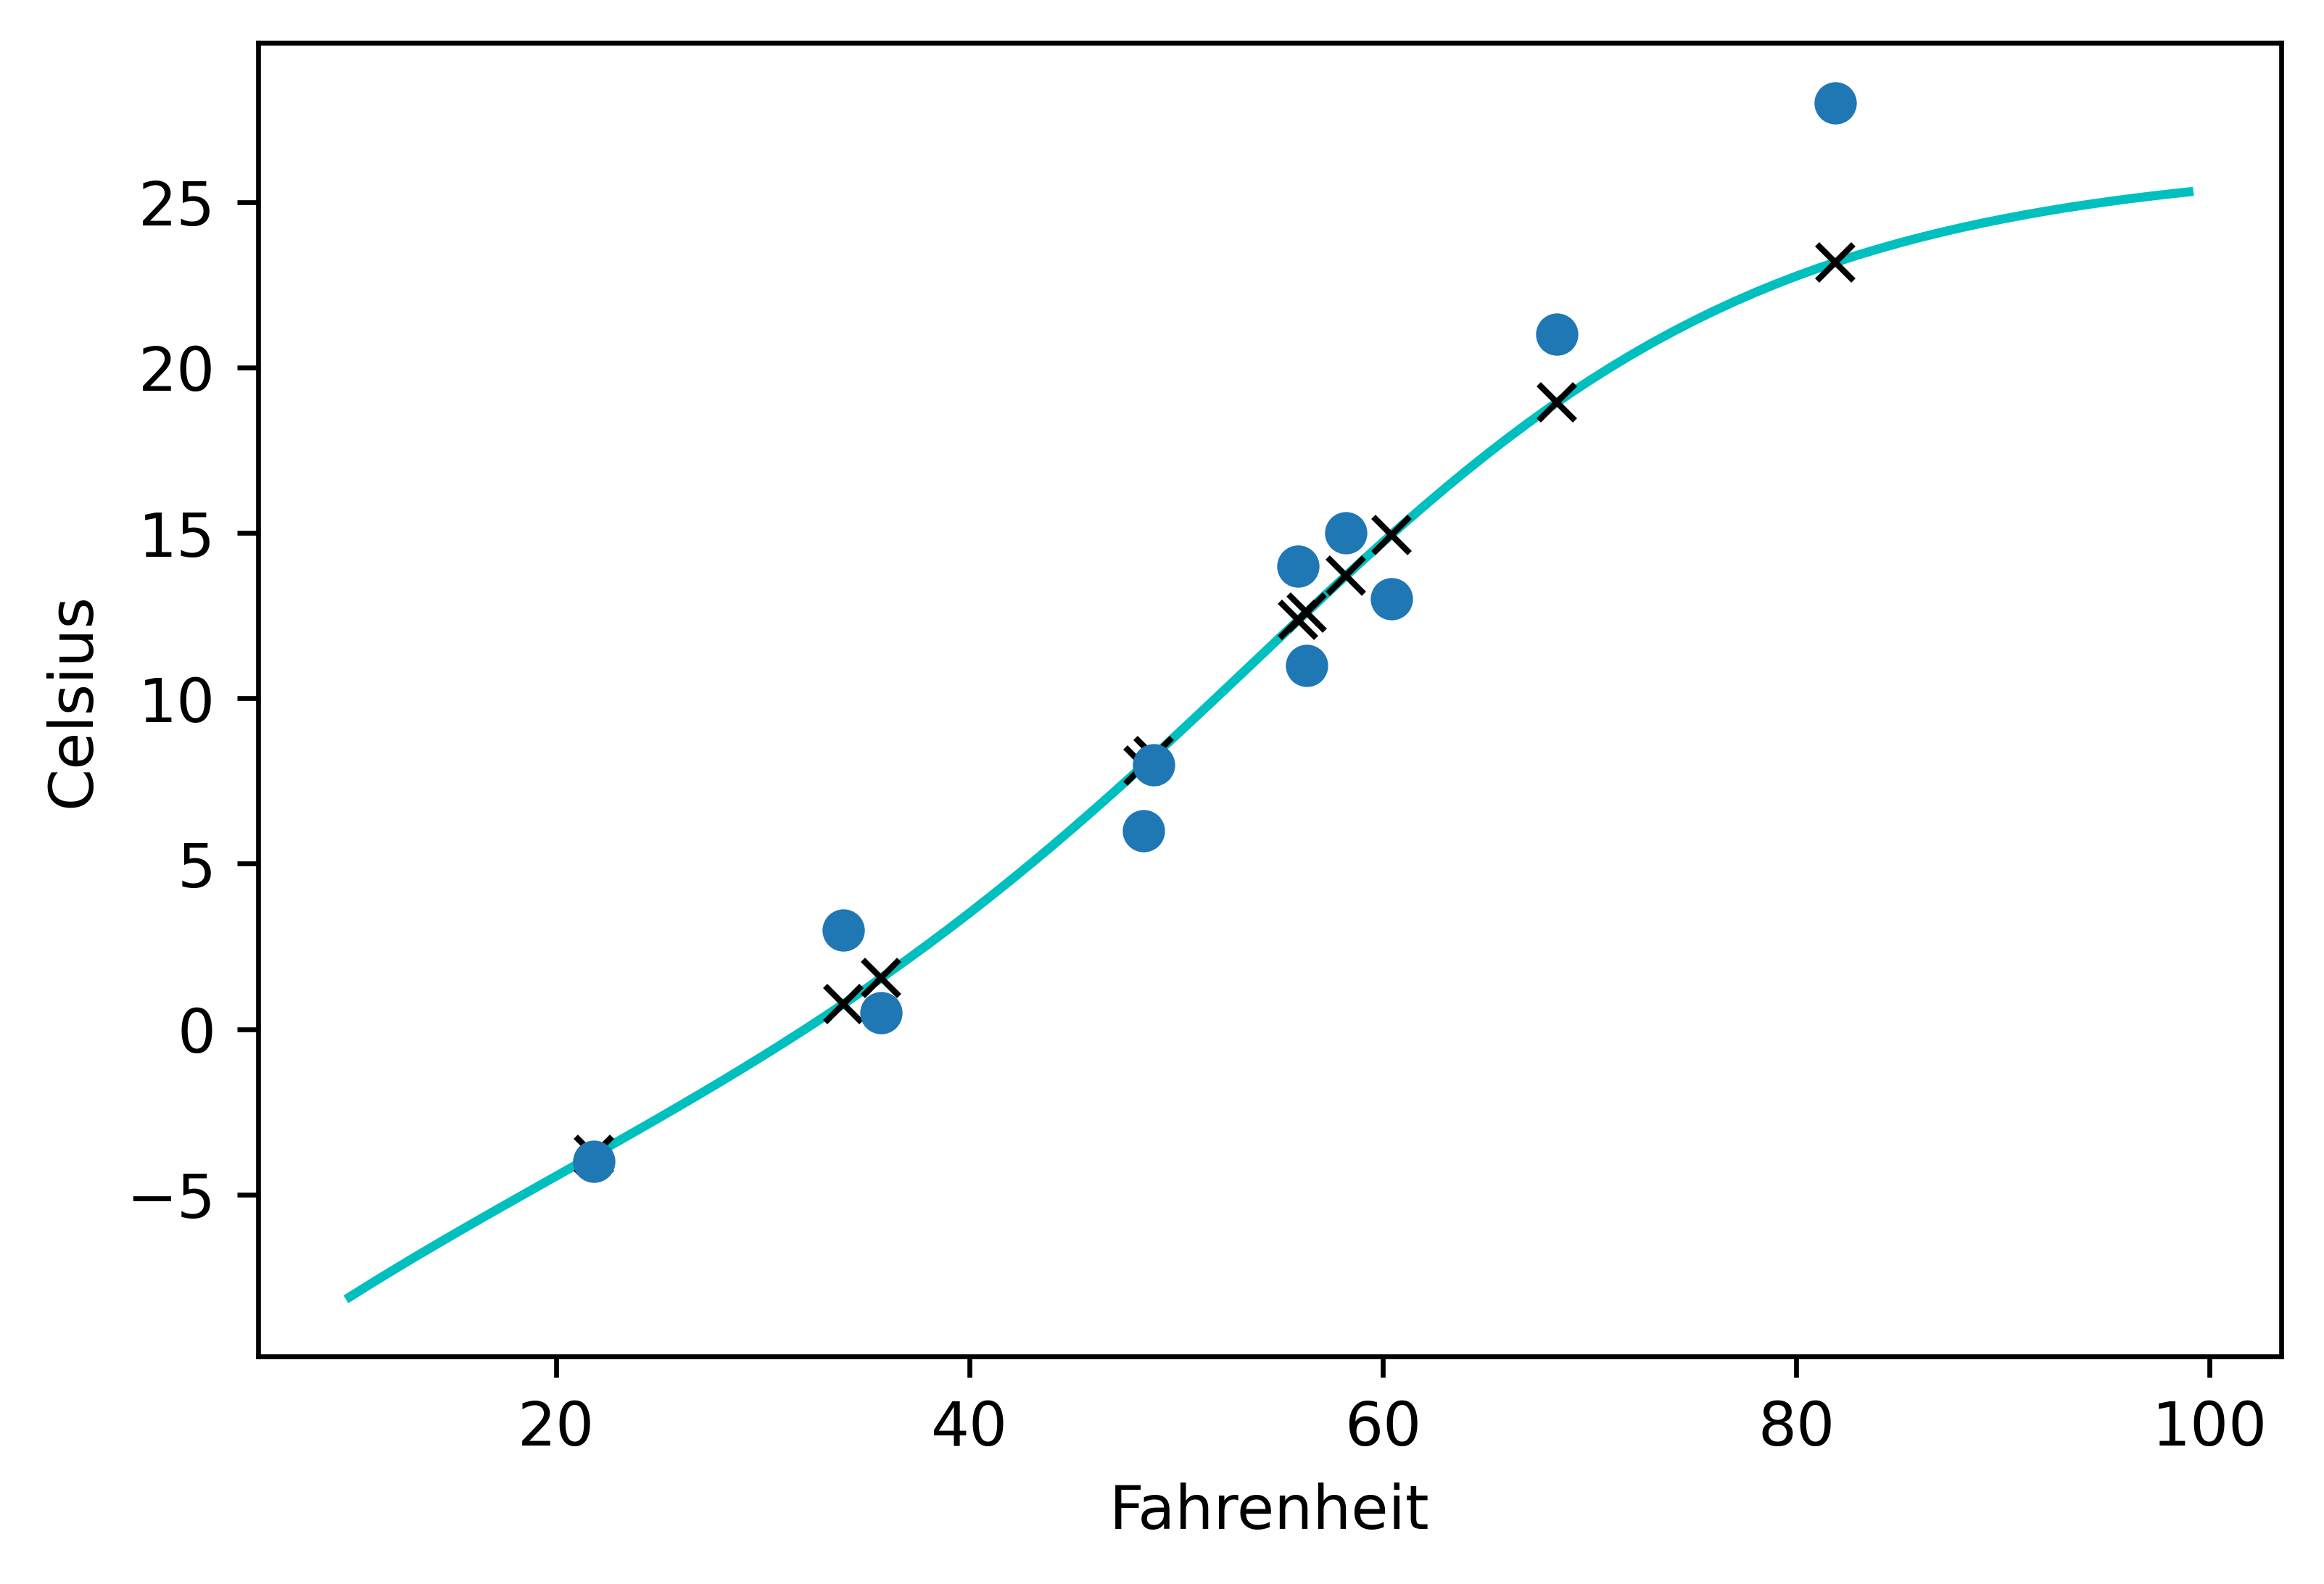

In [45]:
def training_loop(n_epochs, train_t_un, train_t_cel, val_t_un, val_t_cel, model, loss_fn, optimizer):

    for epoch in range(1, n_epochs+1):
        train_t_p = model(train_t_un)
        train_loss = loss_fn(train_t_cel, train_t_p)
        with torch.no_grad():
            val_t_p = model(val_t_un)
            val_loss = loss_fn(val_t_cel, val_t_p)
            assert val_loss.requires_grad == False
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        
        if epoch % 1000 == 0 or epoch <= 3:
            print(f'Epoch {epoch}, Training loss {train_loss.item():.4f}, Validation loss {val_loss.item():.4f}')
    
    fig = plt.figure(dpi=600)
    t_range = torch.arange(10., 100.).unsqueeze(1)
    plt.xlabel('Fahrenheit')
    plt.ylabel('Celsius')
    plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
    plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')
    plt.plot(t_u.numpy(), t_cel.numpy(), 'o')
    #return list(model.parameters())
    print('output', model(val_t_un))
    print('answer', val_t_cel)
    print('hidden', seq_model[2].weight.grad)

optimizer = optim.SGD(seq_model.parameters(), lr = 1e-3)
training_loop(
    n_epochs=3000,
    train_t_un=train_t_un, train_t_cel=train_t_cel, val_t_un=val_t_un, val_t_cel=val_t_cel,
    model=seq_model,
    loss_fn=nn.MSELoss(),
    optimizer=optimizer
)